In [1]:
using Plots

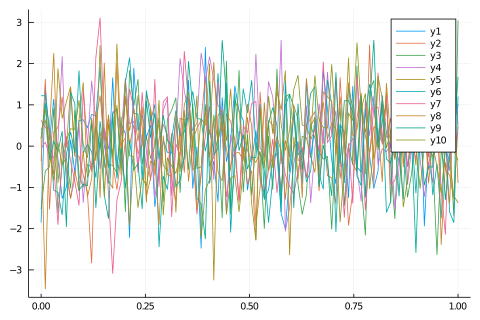

In [13]:
plot(range(0, stop=1, length=100), randn(100, 10), dpi=20)

In [14]:
module Optimizers
export steepest_descent_backtrack
function steepest_descent_backtrack(x0, f, gradf, alpha0, kmax, tollgrad, c1, rho, btmap)
    return (xk, fk, gradfk_norm, k, xseq, btseq)
end
end

Main.Optimizers

In [3]:
# TODO(Andrea): implement steepest descent method with backtracking